In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\user\Desktop\Data Analysis and Ai\DS\Decision Tree\HousingData.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df.shape

(506, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


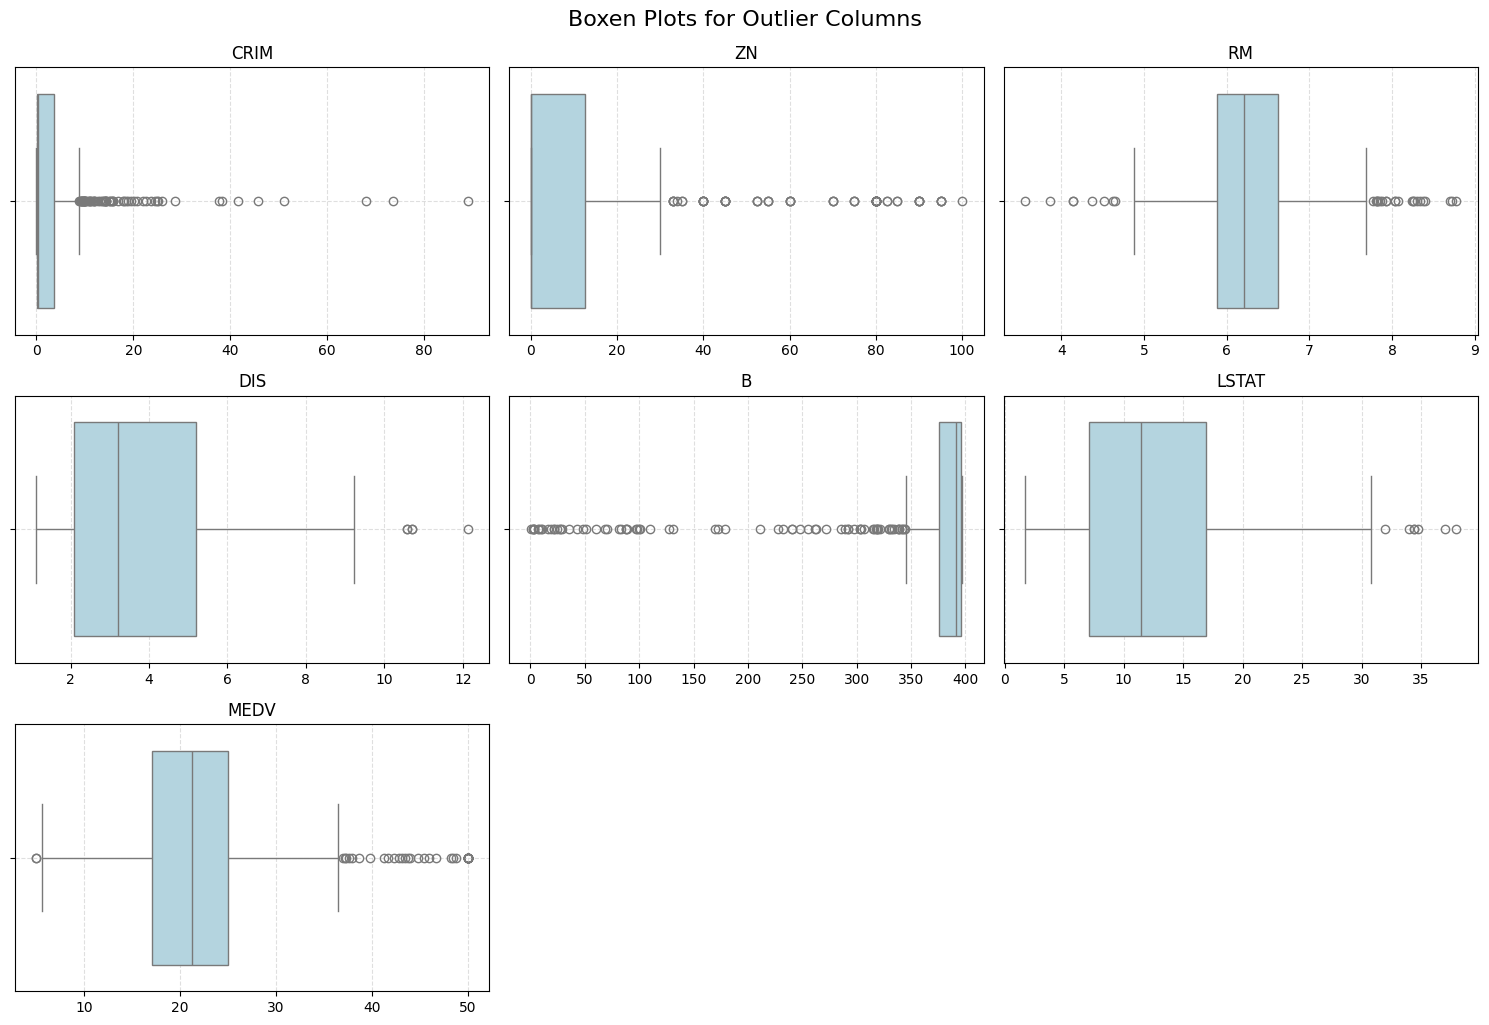

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# الأعمدة اللي فيها outliers
columns = ['CRIM', 'ZN', 'RM', 'DIS', 'B', 'LSTAT', 'MEDV']

# إعداد الشكل: عدد الصفوف = 3، الأعمدة = 3 (حسب عدد المتغيرات)
plt.figure(figsize=(15, 10))

for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i)  # 3 صفوف × 3 أعمدة، المؤشر يبدأ من 1
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'{col}')
    plt.xlabel('')
    plt.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.suptitle('Boxen Plots for Outlier Columns', fontsize=16, y=1.02)
plt.show()


<Axes: xlabel='CHAS', ylabel='MEDV'>

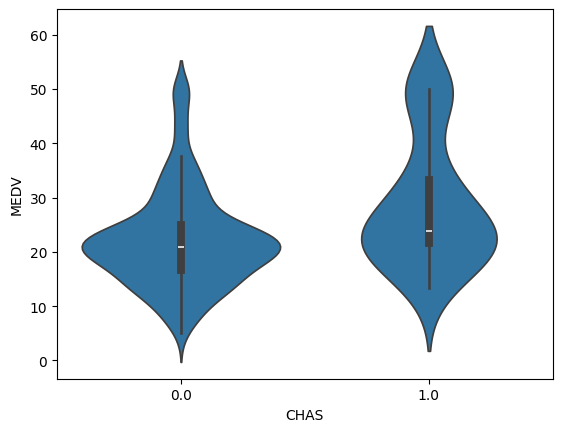

In [14]:
sns.violinplot(x=df['CHAS'], y=df['MEDV'])


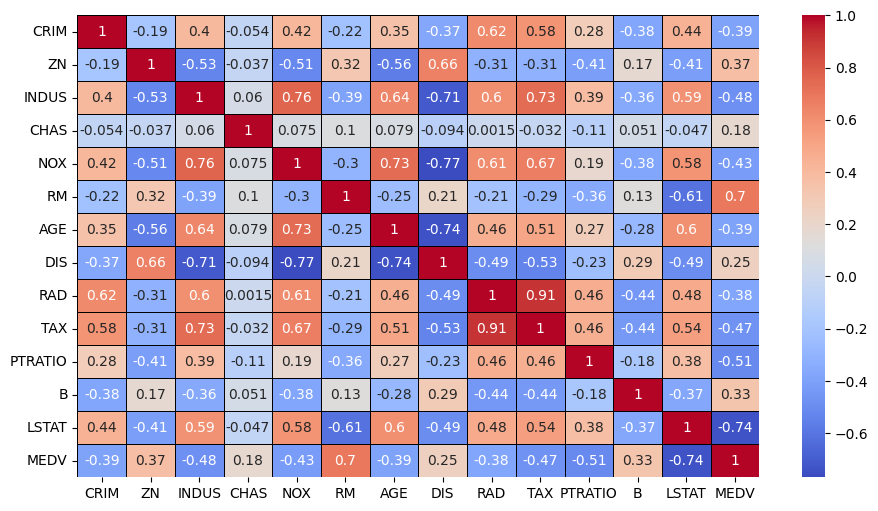

In [8]:
plt.figure(figsize=(11, 6))  # ← كبرنا حجم الشكل لتكبر المربعات
sns.heatmap(df.corr(),
            annot=True,
            cmap='coolwarm',
            linecolor='black',
            linewidths=0.5)
plt.show()

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

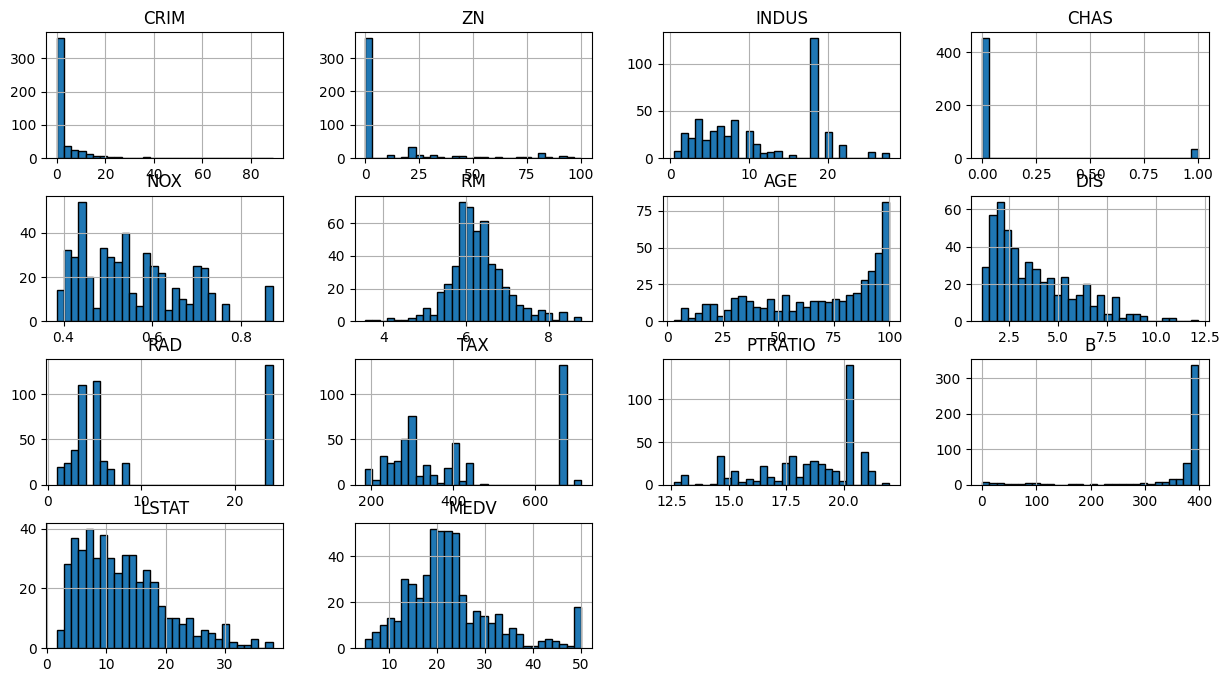

In [31]:
df.hist(figsize=(15,8), bins=30, edgecolor='black')

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1513: UserWarning: Igno

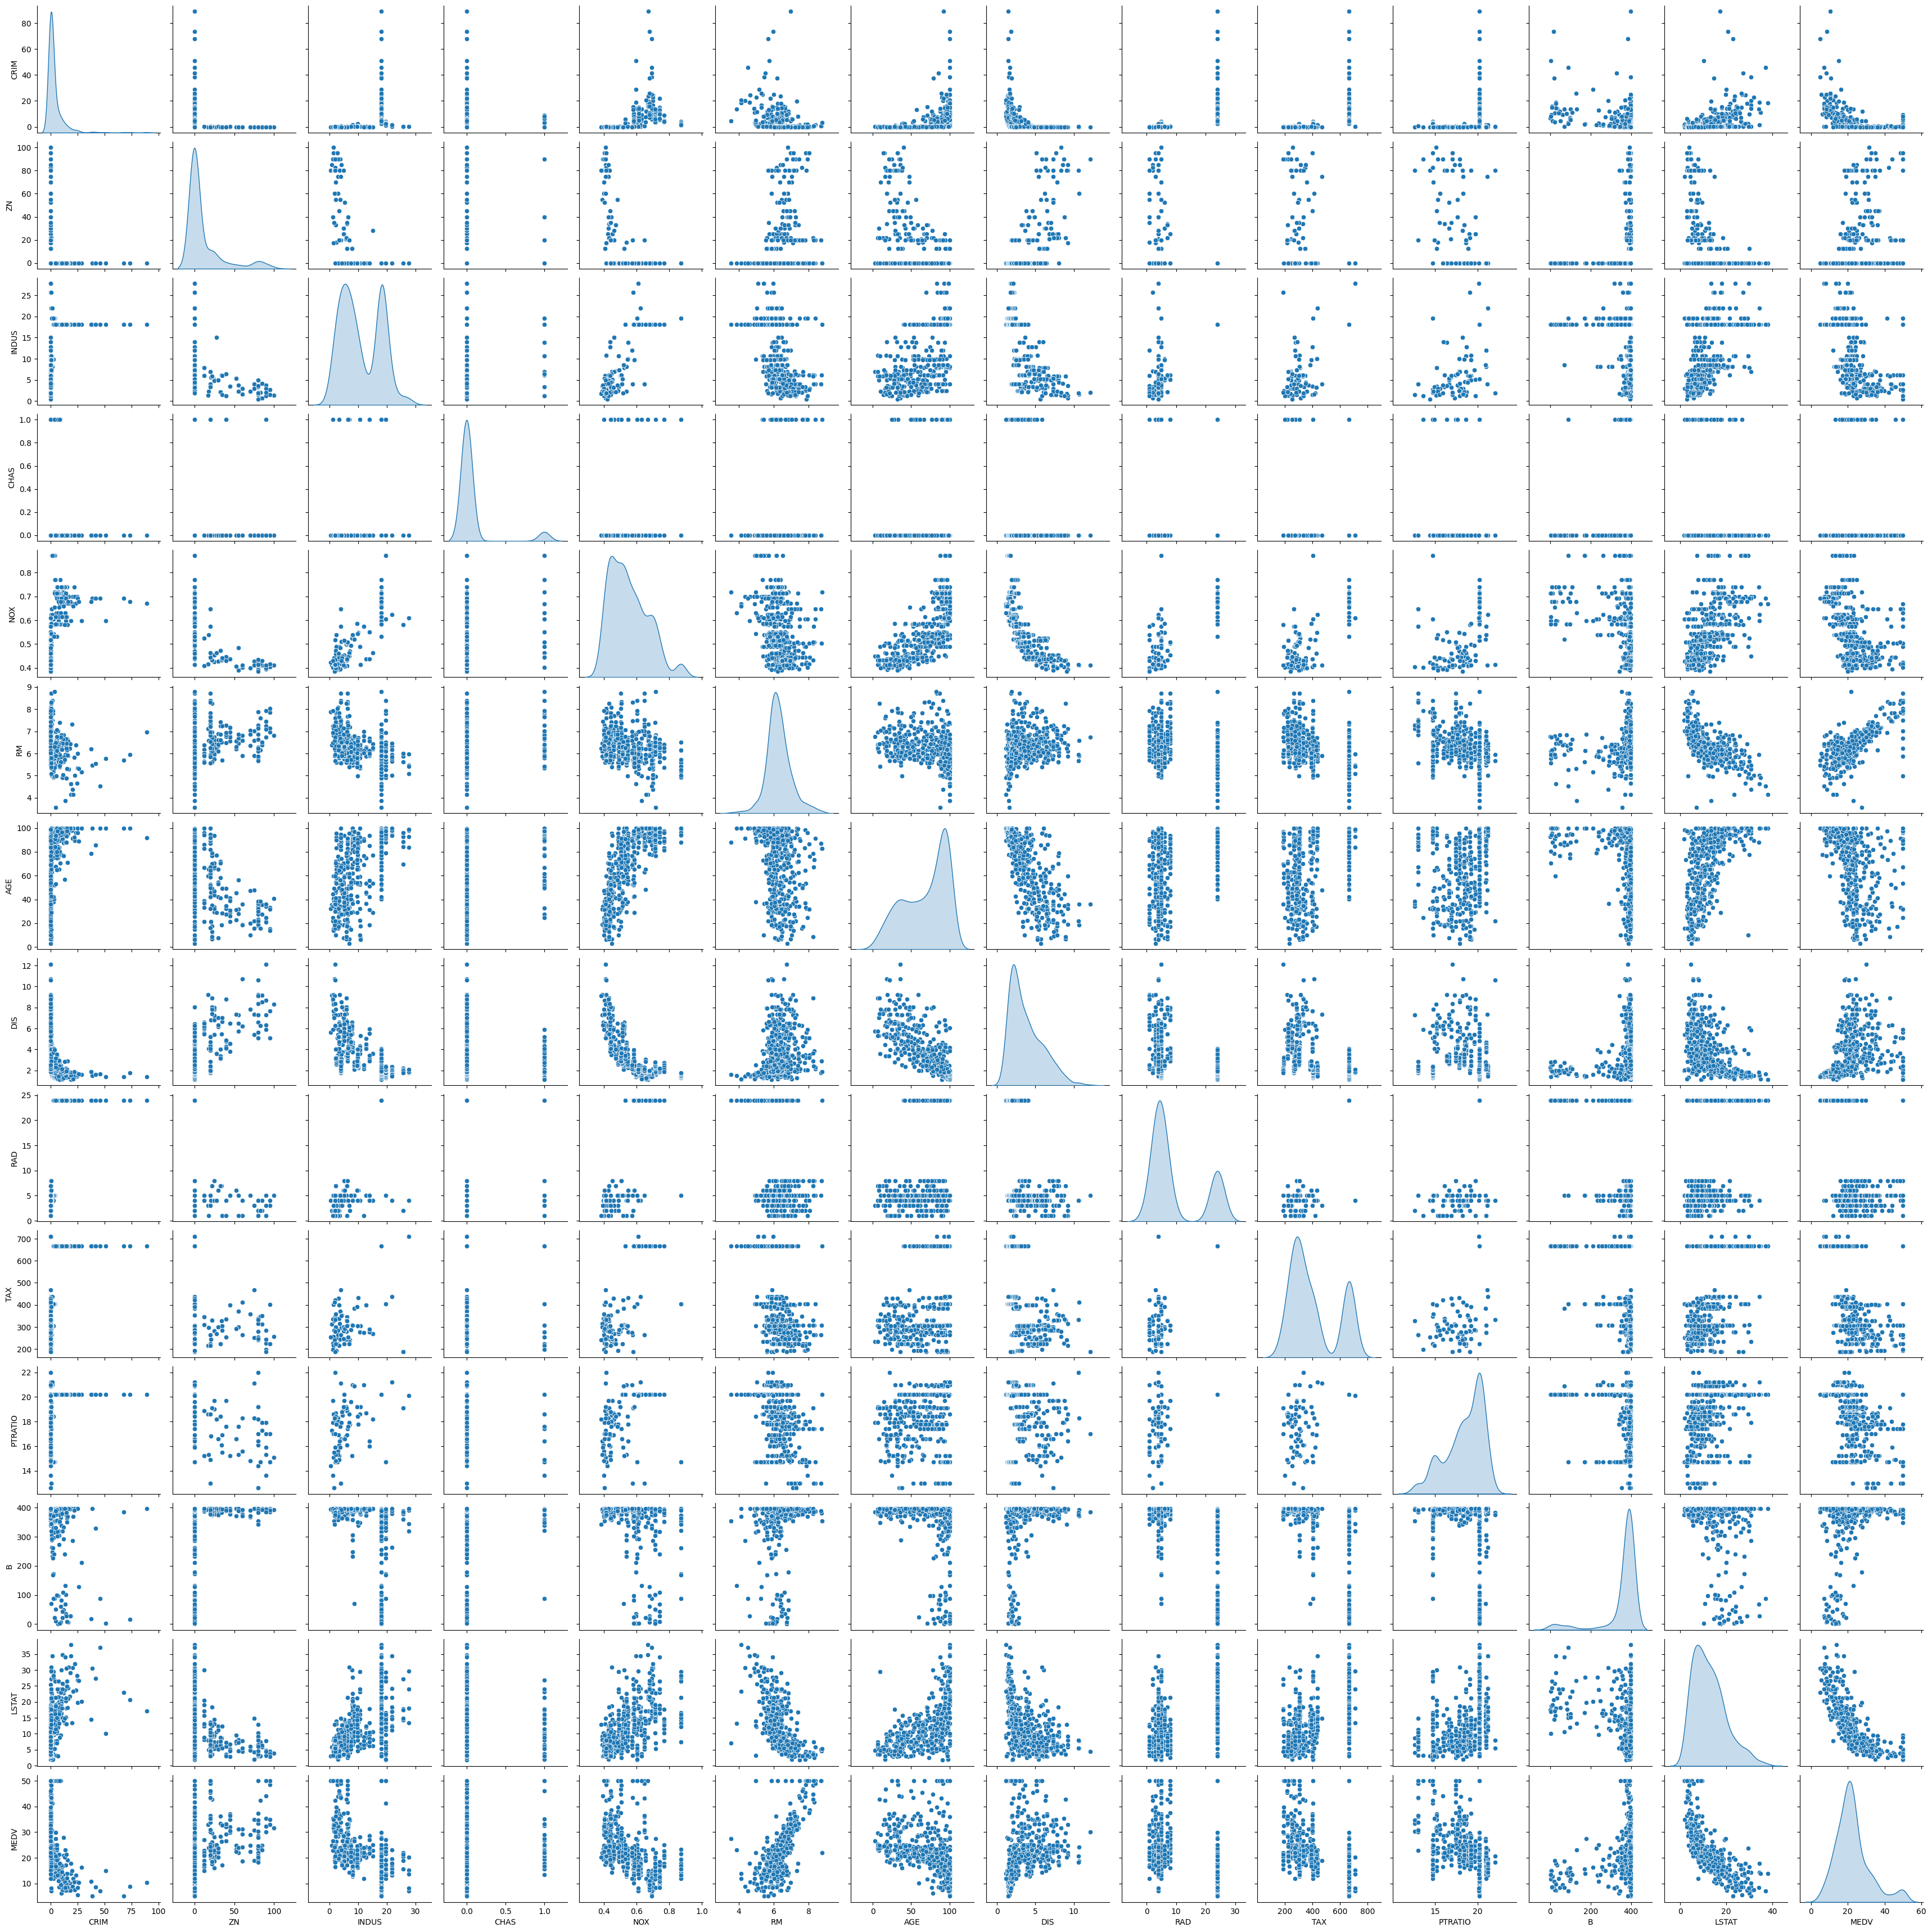

In [12]:
sns.pairplot(df, diag_kind='kde', markers='o', palette='coolwarm')

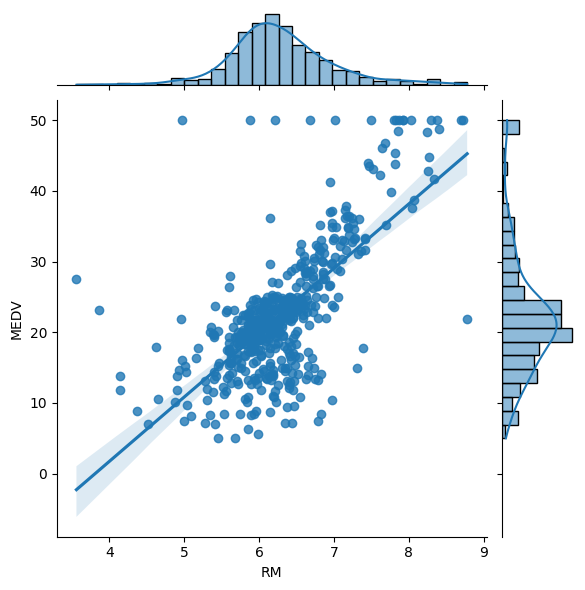

In [13]:
sns.jointplot(x='RM', y='MEDV', data=df, kind='reg')


<Axes: xlabel='CHAS', ylabel='MEDV'>

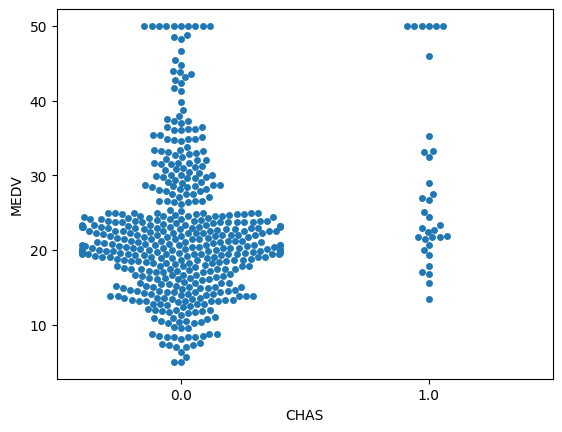

In [15]:
sns.swarmplot(x=df['CHAS'], y=df['MEDV'])


<Axes: >

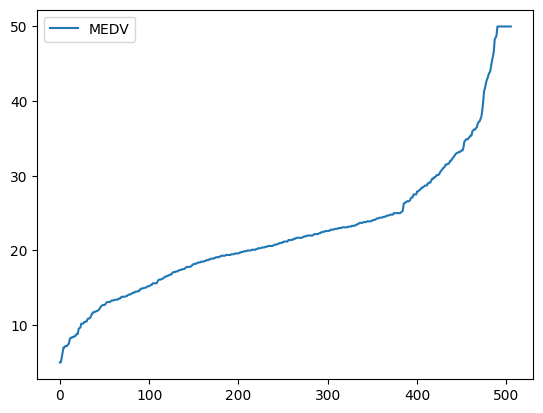

In [16]:
sns.lineplot(data=df[['MEDV']].sort_values(by='MEDV').reset_index(drop=True))


<Axes: xlabel='CHAS', ylabel='MEDV'>

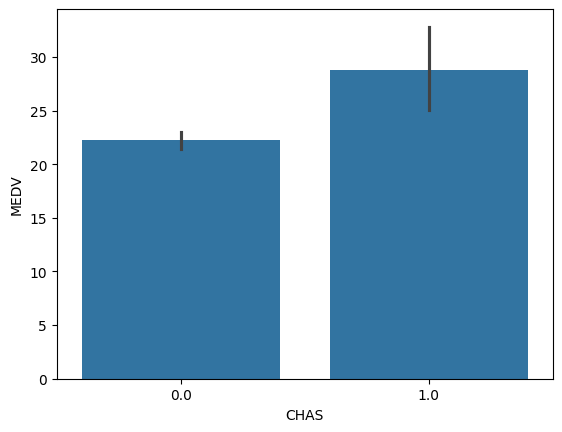

In [17]:
sns.barplot(x=df['CHAS'], y=df['MEDV'])


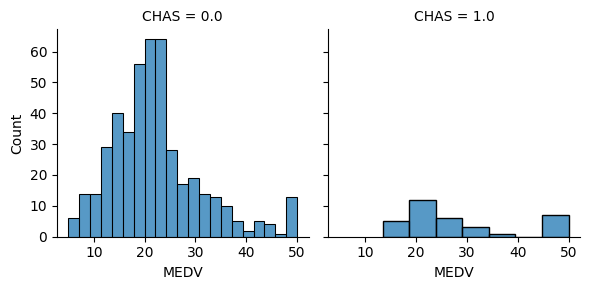

In [18]:
g = sns.FacetGrid(df, col="CHAS")
g.map(sns.histplot, "MEDV")


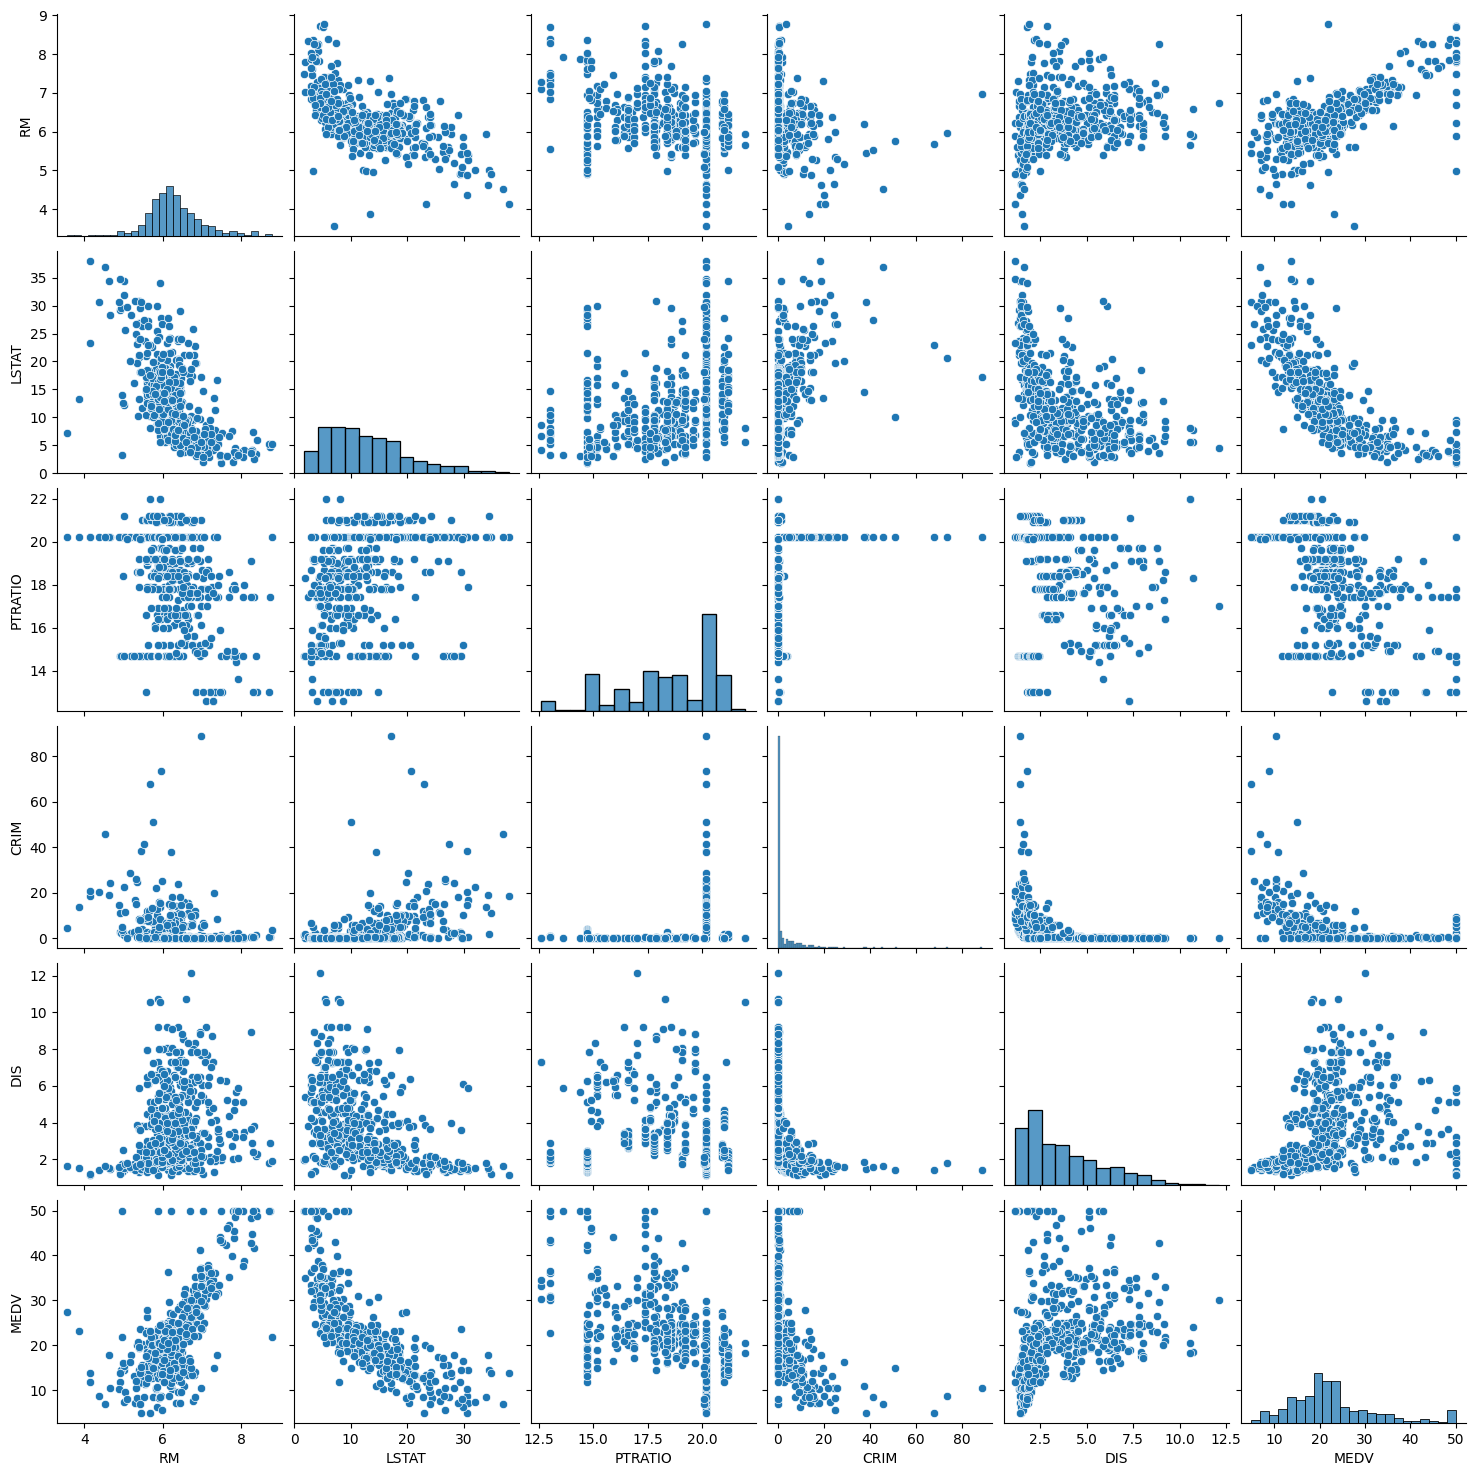

In [19]:
important_cols = ['RM', 'LSTAT', 'PTRATIO', 'CRIM', 'DIS', 'MEDV']
sns.pairplot(df[important_cols])
plt.show()

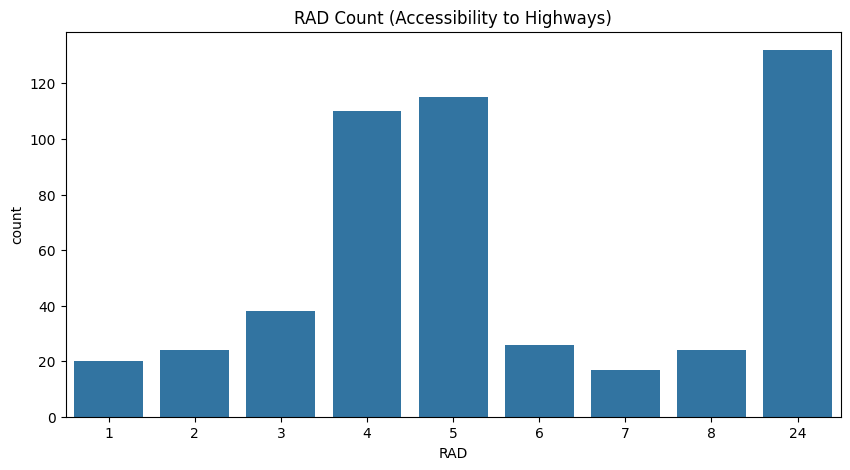

In [22]:
plt.figure(figsize=(10, 5))
sns.countplot(x='RAD', data=df)
plt.title("RAD Count (Accessibility to Highways)")
plt.show()

In [25]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536


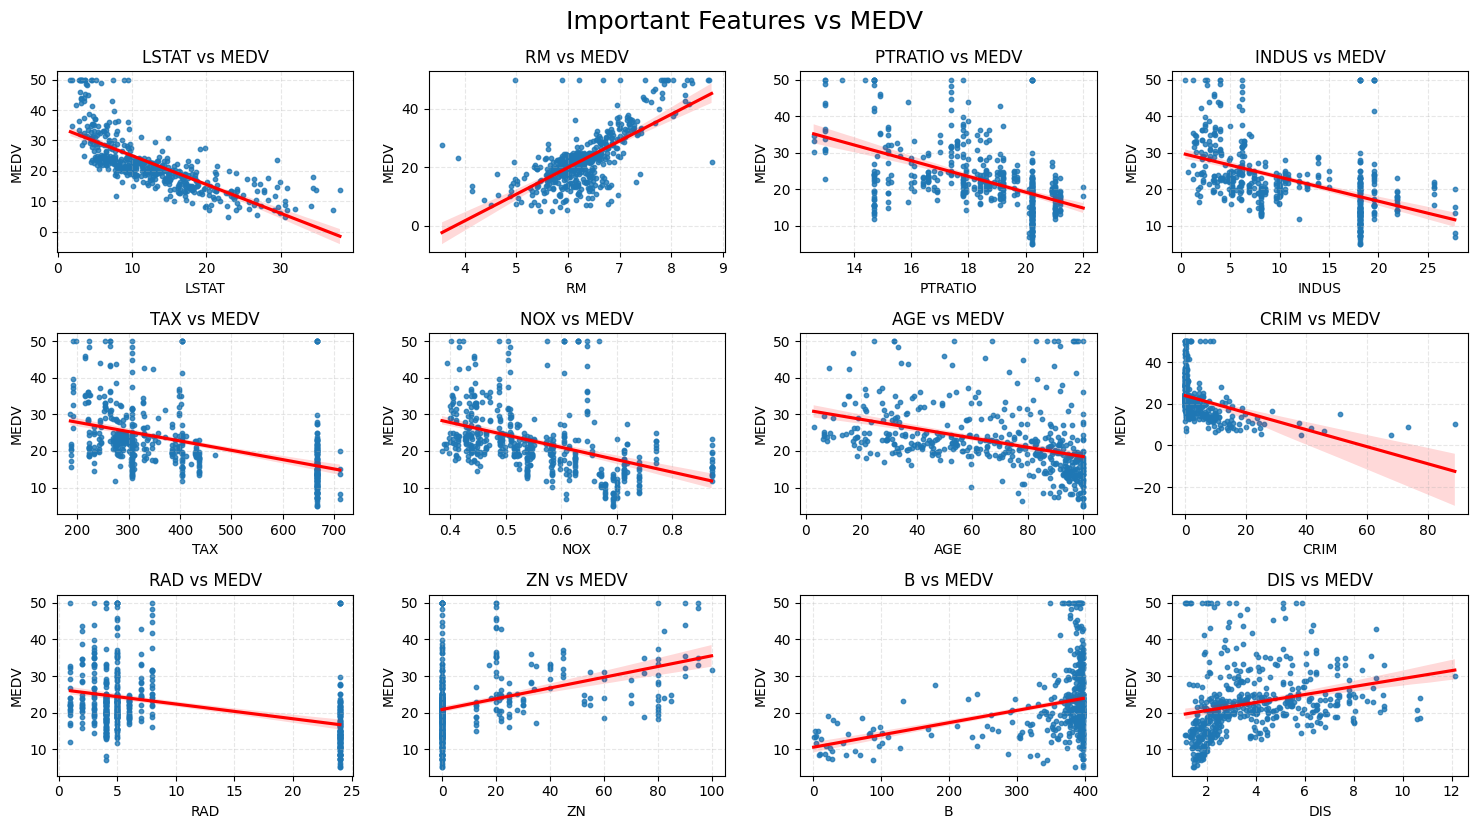

In [29]:
# أهم المتغيرات المرتبطة بـ MEDV
important_features = ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX',
                      'AGE', 'CRIM', 'RAD', 'ZN', 'B', 'DIS']

# إعداد الشكل (3 صفوف × 4 أعمدة)
plt.figure(figsize=(15, 8))
for i, col in enumerate(important_features, 1):
    plt.subplot(3, 4, i)
    sns.regplot(x=df[col], y=df['MEDV'], scatter_kws={"s": 10}, line_kws={"color": "red"})
    plt.title(f'{col} vs MEDV')
    plt.xlabel(col)
    plt.ylabel('MEDV')
    plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.suptitle("Important Features vs MEDV", fontsize=18, y=1.03)
plt.show()

# Data Preprocessing

Data cleaing

In [39]:
cl_df = df.copy()

In [40]:
cl_df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [42]:
cl_df['AGE'] = cl_df['AGE'].fillna(cl_df['AGE'].median())
cl_df['LSTAT'] = cl_df['LSTAT'].fillna(cl_df['LSTAT'].median())
cl_df['CRIM'] = cl_df['CRIM'].fillna(cl_df['CRIM'].median())
cl_df['ZN'] = cl_df['ZN'].fillna(cl_df['ZN'].median())
cl_df['INDUS'] = cl_df['INDUS'].fillna(cl_df['INDUS'].median())
cl_df['CHAS'] = cl_df['CHAS'].fillna(cl_df['CHAS'].median())

In [43]:
cl_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Outliers

In [50]:
def cap_outliers(df, columns, lower_percentile=0.01, upper_percentile=0.99):
    cl_df = df.copy()
    for col in columns:
        lower_bound = cl_df[col].quantile(lower_percentile)
        upper_bound = cl_df[col].quantile(upper_percentile)
        cl_df[col] = np.where(cl_df[col] < lower_bound, lower_bound, cl_df[col])
        cl_df[col] = np.where(cl_df[col] > upper_bound, upper_bound, cl_df[col])
    return cl_df

# الأعمدة اللي فيها outliers (من تحليلك السابق)
outlier_columns = ['CRIM', 'ZN', 'AGE', 'DIS', 'TAX', 'B', 'LSTAT']

# نطبق الـ capping
capped_df = cap_outliers(df.copy(), outlier_columns)

In [51]:
cl_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [52]:
cl_df.shape

(506, 14)

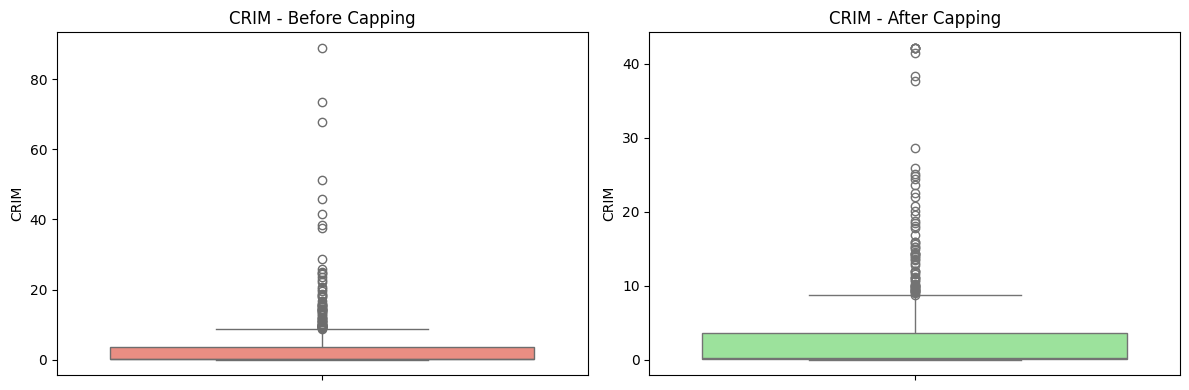

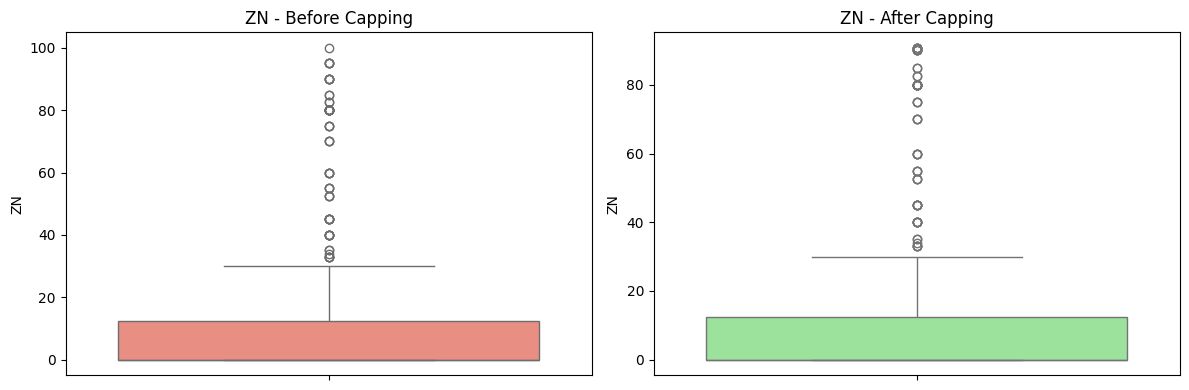

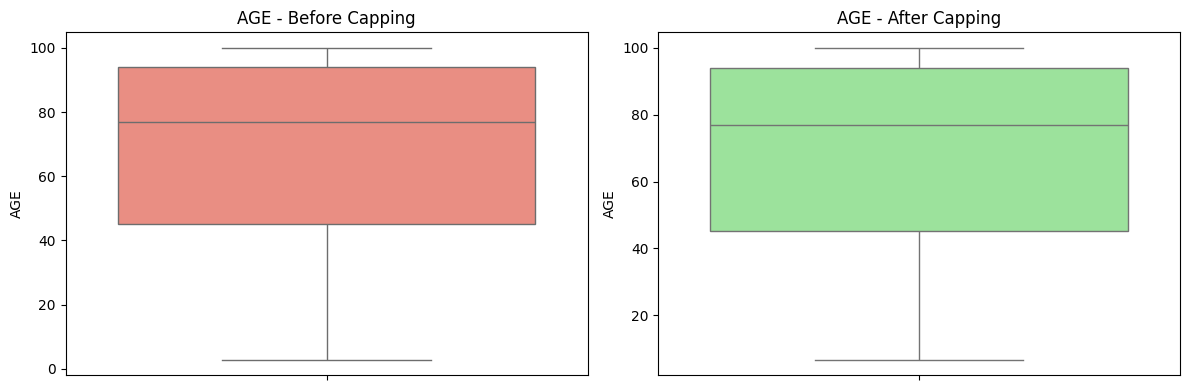

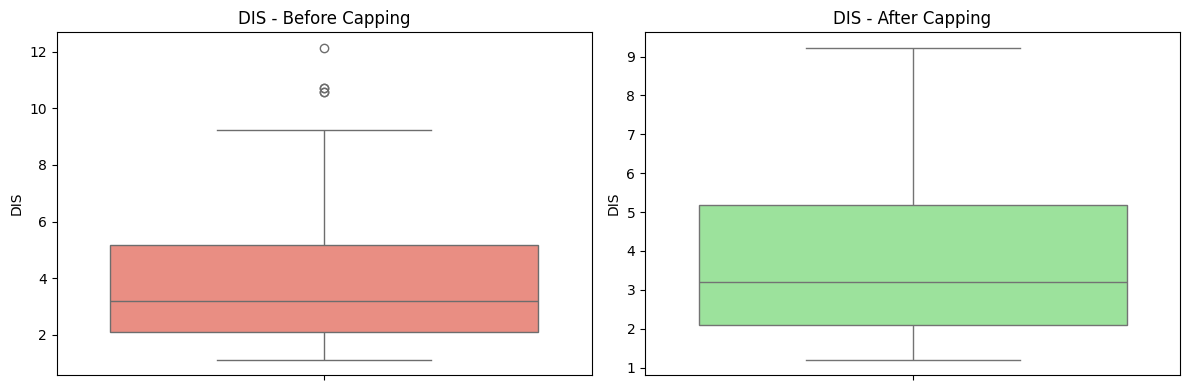

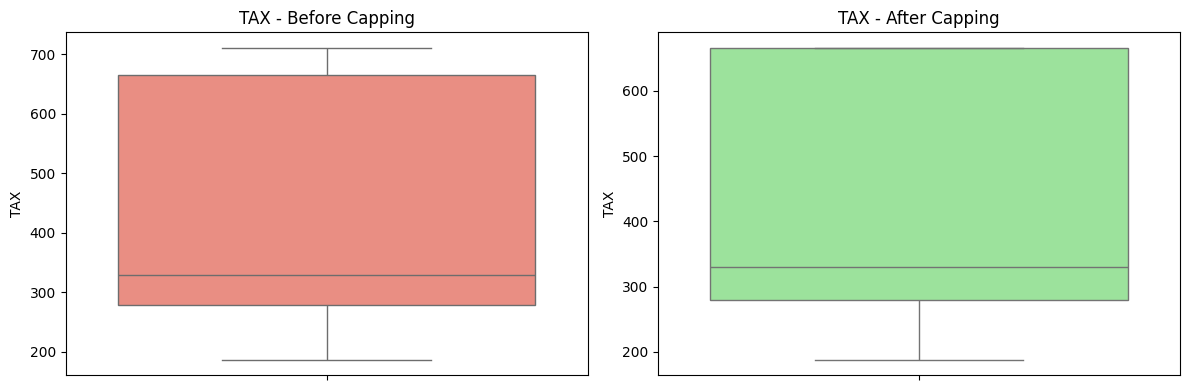

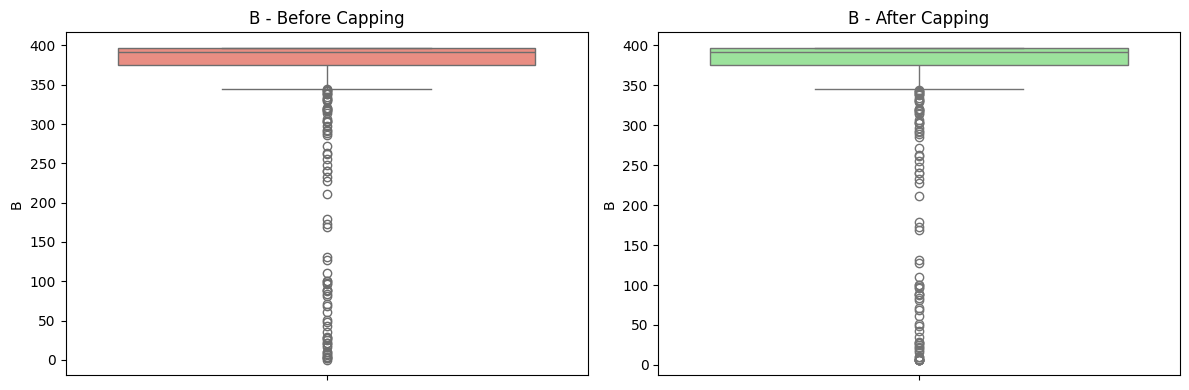

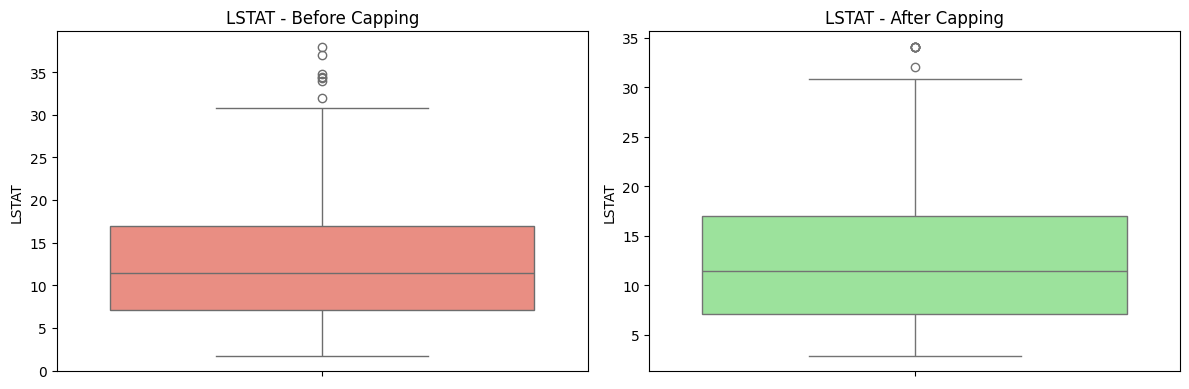

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# الأعمدة اللي فيها أوتلايرز
cols = ['CRIM', 'ZN', 'AGE', 'DIS', 'TAX', 'B', 'LSTAT']

# نرسم Boxplot قبل وبعد التعديل
for col in cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # قبل Capping
    sns.boxplot(y=df[col], ax=axes[0], color='salmon')
    axes[0].set_title(f'{col} - Before Capping')
    
    # بعد Capping
    sns.boxplot(y=capped_df[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'{col} - After Capping')
    
    plt.tight_layout()
    plt.show()


In [55]:
# المتغير المستهدف
target = 'MEDV'

# المتغيرات المستقلة
X = capped_df.drop(columns=target)
y = capped_df[target]


In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [57]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=4, random_state=42)
model.fit(X_train, y_train)


,criterion,'squared_error'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [58]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 Score: 0.8316178333517033
MAE: 2.767768180075621
MSE: 12.34810129705156


CRIM: 0.0420
ZN: 0.0000
INDUS: 0.0000
CHAS: 0.0000
NOX: 0.0231
RM: 0.6215
AGE: 0.0009
DIS: 0.0361
RAD: 0.0296
TAX: 0.0000
PTRATIO: 0.0177
B: 0.0000
LSTAT: 0.2292


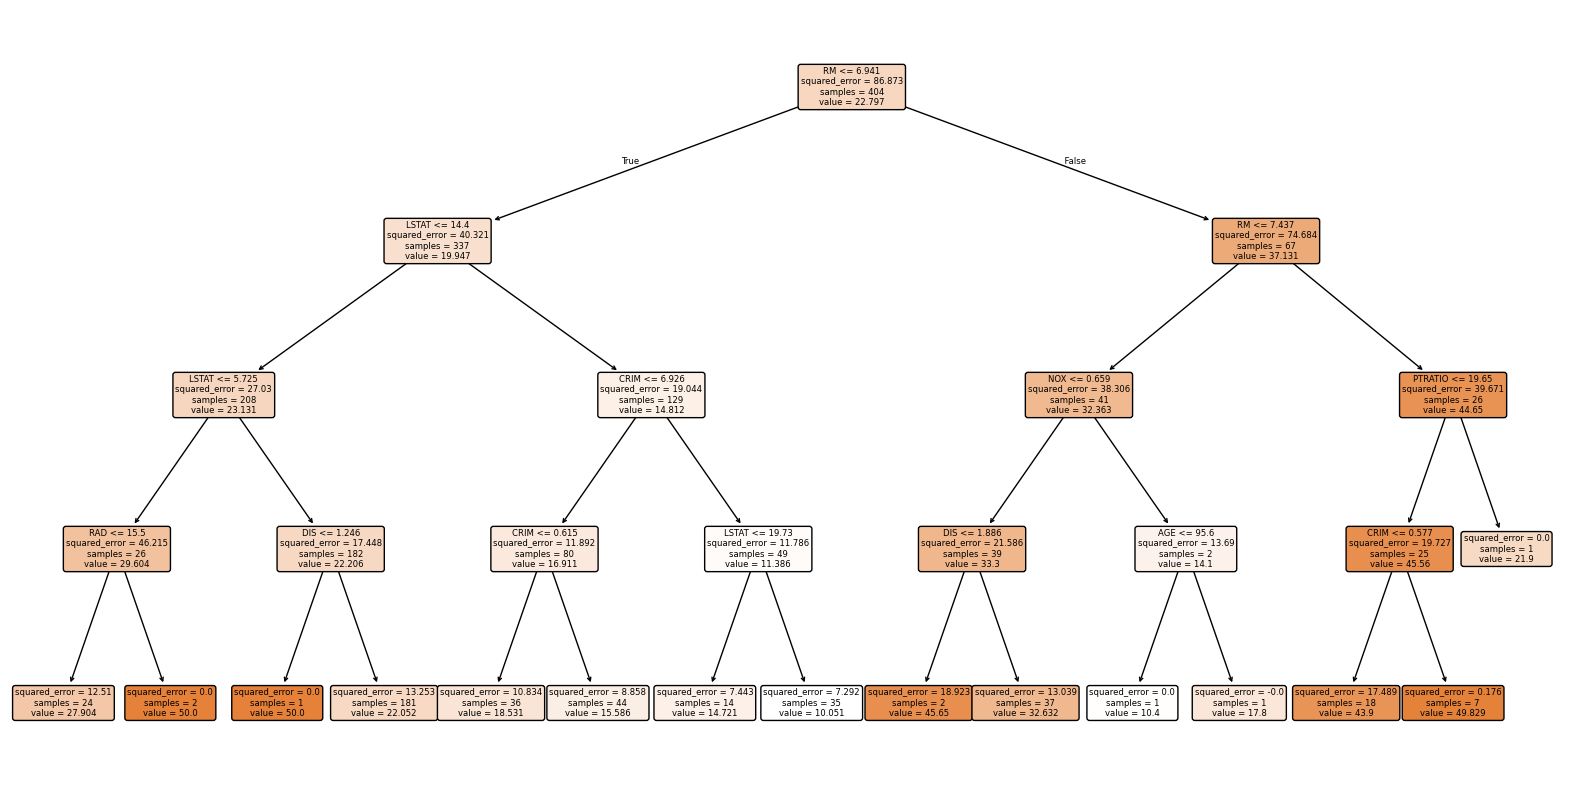

In [59]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# أهمية الخصائص
importances = model.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")

# رسم الشجرة
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
plt.show()


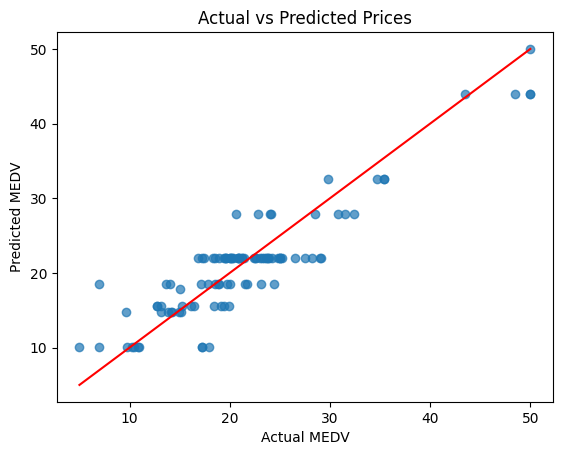

In [60]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()


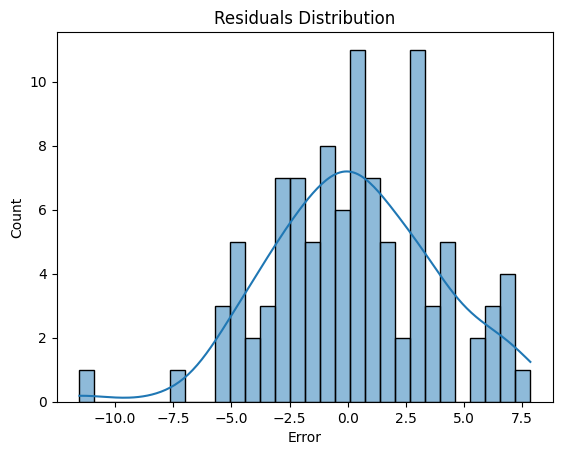

In [61]:
import seaborn as sns
sns.histplot(y_test - y_pred, bins=30, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Error")
plt.show()


In [64]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

# ❶ فصل البيانات (لو مش محفوظة من قبل)
X = capped_df.drop('MEDV', axis=1)
y = capped_df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

# ❷ تعريف النموذج الأساسى
dt = DecisionTreeRegressor(random_state=42)

# ❸ شبكة المعاملات المراد اختبارها
param_grid = {
    'max_depth':        [None, 3, 4, 5, 6, 8, 10],
    'min_samples_split':[2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6],
    'ccp_alpha':        [0.0, 0.0001, 0.001, 0.01]
}

# ❹ البحث الشبكى مع 5‑Fold CV
grid = GridSearchCV(
        estimator=dt,
        param_grid=param_grid,
        cv=5,
        scoring='r2',
        n_jobs=-1,
        verbose=1)

grid.fit(X_train, y_train)

print("أفضل معاملات:", grid.best_params_)
print("أفضل R² فى الـ CV:", grid.best_score_.round(4))

# ❺ تقييم النموذج المُحسَّن على اختبار مستقل
best_dt = grid.best_estimator_
y_pred = best_dt.predict(X_test)

print("R² :",  round(r2_score(y_test, y_pred), 4))
print("MAE:",  round(mean_absolute_error(y_test, y_pred), 4))
print("MSE:",  round(mean_squared_error(y_test, y_pred), 4))



Fitting 5 folds for each of 560 candidates, totalling 2800 fits
أفضل معاملات: {'ccp_alpha': 0.0, 'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 2}
أفضل R² فى الـ CV: 0.7202
R² : 0.7522
MAE: 2.7834
MSE: 18.1714


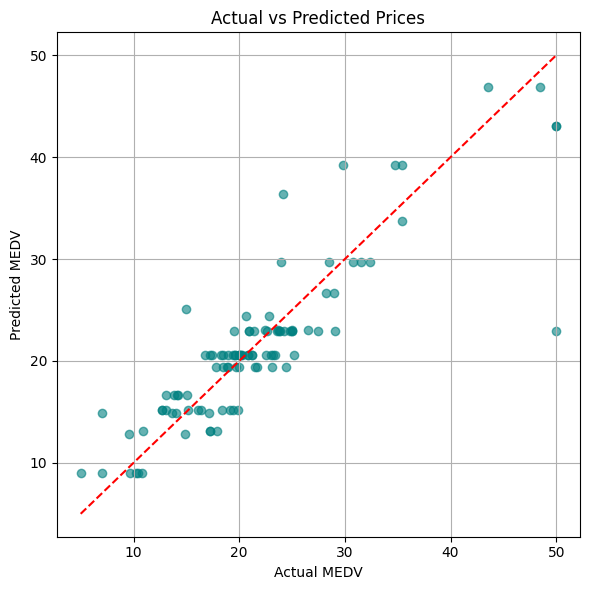

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.tight_layout()
plt.show()


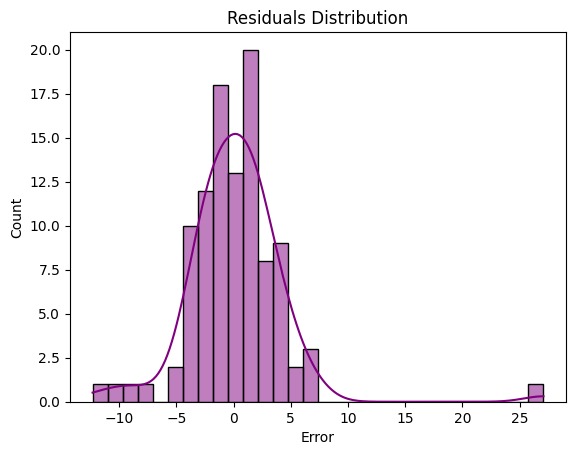

In [67]:
import seaborn as sns

residuals = y_test - y_pred
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.title("Residuals Distribution")
plt.xlabel("Error")
plt.show()
